In [1]:
# do imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re 
import string 
import nltk 
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

In [2]:
# Scrape Tweets

import snscrape.modules.twitter as sntwitter
import pandas as pd

# declare variables and query
tweets_list = []
tweet_count = 1000
query = "Trump since:2021-01-01 until:2022-11-13" 

# use TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper(query).get_items()):
    if i>tweet_count:
        break
    tweets_list.append([tweet.date, tweet.id, tweet.content, tweet.user.username])
    
# Creating a dataframe from the tweets list above
tweets_df = pd.DataFrame(tweets_list, columns=['Datetime', 'Tweet Id', 'Text', 'Username'])
tweets_df

,Datetime,Tweet Id,Text,Username
0,2022-11-12 23:59:59+00:00,1591581606527270912,@TheRickWilson She’s got the fashion sense of ...,stelladennard
1,2022-11-12 23:59:59+00:00,1591581603993907201,@richsignorelli What makes it crazy is that ha...,Bears34Girl
2,2022-11-12 23:59:58+00:00,1591581601829654528,"When Kari Snake loses, then the real news cove...",JustJarv
3,2022-11-12 23:59:58+00:00,1591581599262740480,"@DBCanyon If Trump runs I’m voting for him, bu...",PeterAnthony96
4,2022-11-12 23:59:57+00:00,1591581596981014528,@FoxNews Trump is a lost puppy can't handle de...,angleonfire63
...,...,...,...,...
996,2022-11-12 23:54:27+00:00,1591580211715649536,@RepMTG Kinda seems as if you’re going to have...,Carolyn42955675
997,2022-11-12 23:54:26+00:00,1591580209270390784,@merlynius2 @HighlandScot73 @LambroSto @seanha...,weatikru
998,2022-11-12 23:54:24+00:00,1591580201317703683,@marklevinshow @SenTedCruz BKA #CancunCruz or ...,Blessed5012
999,2022-11-12 23:54:24+00:00,1591580200625733632,@lib_crusher Remember 2 months ago when it cam...,ctsfumo


In [3]:
# clean tweets

def clean_string(a):
    
    # remove emoji's
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    a = emoji_pattern.sub(r'', a)

    # remove @ symbols and hashtags
    re_list = ['@[A-Za-z0–9_]+', '#']
    combined_re = re.compile( '|'.join( re_list) )
    a = re.sub(combined_re,'',a)

    # remove urls from text
    pattern = re.compile(r'(https?://)?(www\.)?(\w+\.)?(\w+)(\.\w+)(/.+)?')
    a = re.sub(pattern,'',a)
    output = a
    return output



# clean tweets with function we wrote above
df = tweets_df
for i in range(1001):
    df['Text'][i] = clean_string(df.iloc[i]['Text'])
    
for i in range(5):
    output = df.iloc[i]['Text']
    print(output)
    print('\n')


 She’s got the fashion sense of a trump.


 What makes it crazy is that had the Trump endorsed candidates won they would be hailing him as hero. It's great they are turning on him but they were the ones that created his power to begin with. Thank God that didn't last long. Now he needs to be locked up as a grand conclusion 


When Kari Snake loses, then the real news coverage begins. Will Fatboy Donny announce anything? Will Merrick make a surprise call? Right now Trumps following is confused because Fox isn’t kissing his ass even though Tuckers mouth looks puckered up.


 If Trump runs I’m voting for him, but know this - they will stop him at all cost. He will not win


 Trump is a lost puppy can't handle defeat




In [4]:
# save to csvs just in case
df.to_csv(r'C:\Users\maxma\Downloads\CS\NLP\Full Walk Through\BidenTweets.csv')

In [5]:
# generate word cloud

from nltk.tokenize import WordPunctTokenizer
tk = WordPunctTokenizer()

def tokenize_and_process(d):
    
    d = str(d)
    lower_case = d.lower()
    words = tk.tokenize(lower_case)
    result_words = [x for x in words if len(x) > 2]
    return (" ".join(result_words)).strip()

processed_tweets = []
print ('Processsing and tokenizing tweets')
for i in range(1000):
    if i % 100 == 0:
        print("Tweets {} of {} have been processed".format(i, 1000))
    processed_tweets.append(tokenize_and_process(df.Text[i]))
    
    
string = pd.Series(processed_tweets).str.cat(sep=' ')

Processsing and tokenizing tweets
Tweets 0 of 1000 have been processed
Tweets 100 of 1000 have been processed
Tweets 200 of 1000 have been processed
Tweets 300 of 1000 have been processed
Tweets 400 of 1000 have been processed
Tweets 500 of 1000 have been processed
Tweets 600 of 1000 have been processed
Tweets 700 of 1000 have been processed
Tweets 800 of 1000 have been processed
Tweets 900 of 1000 have been processed


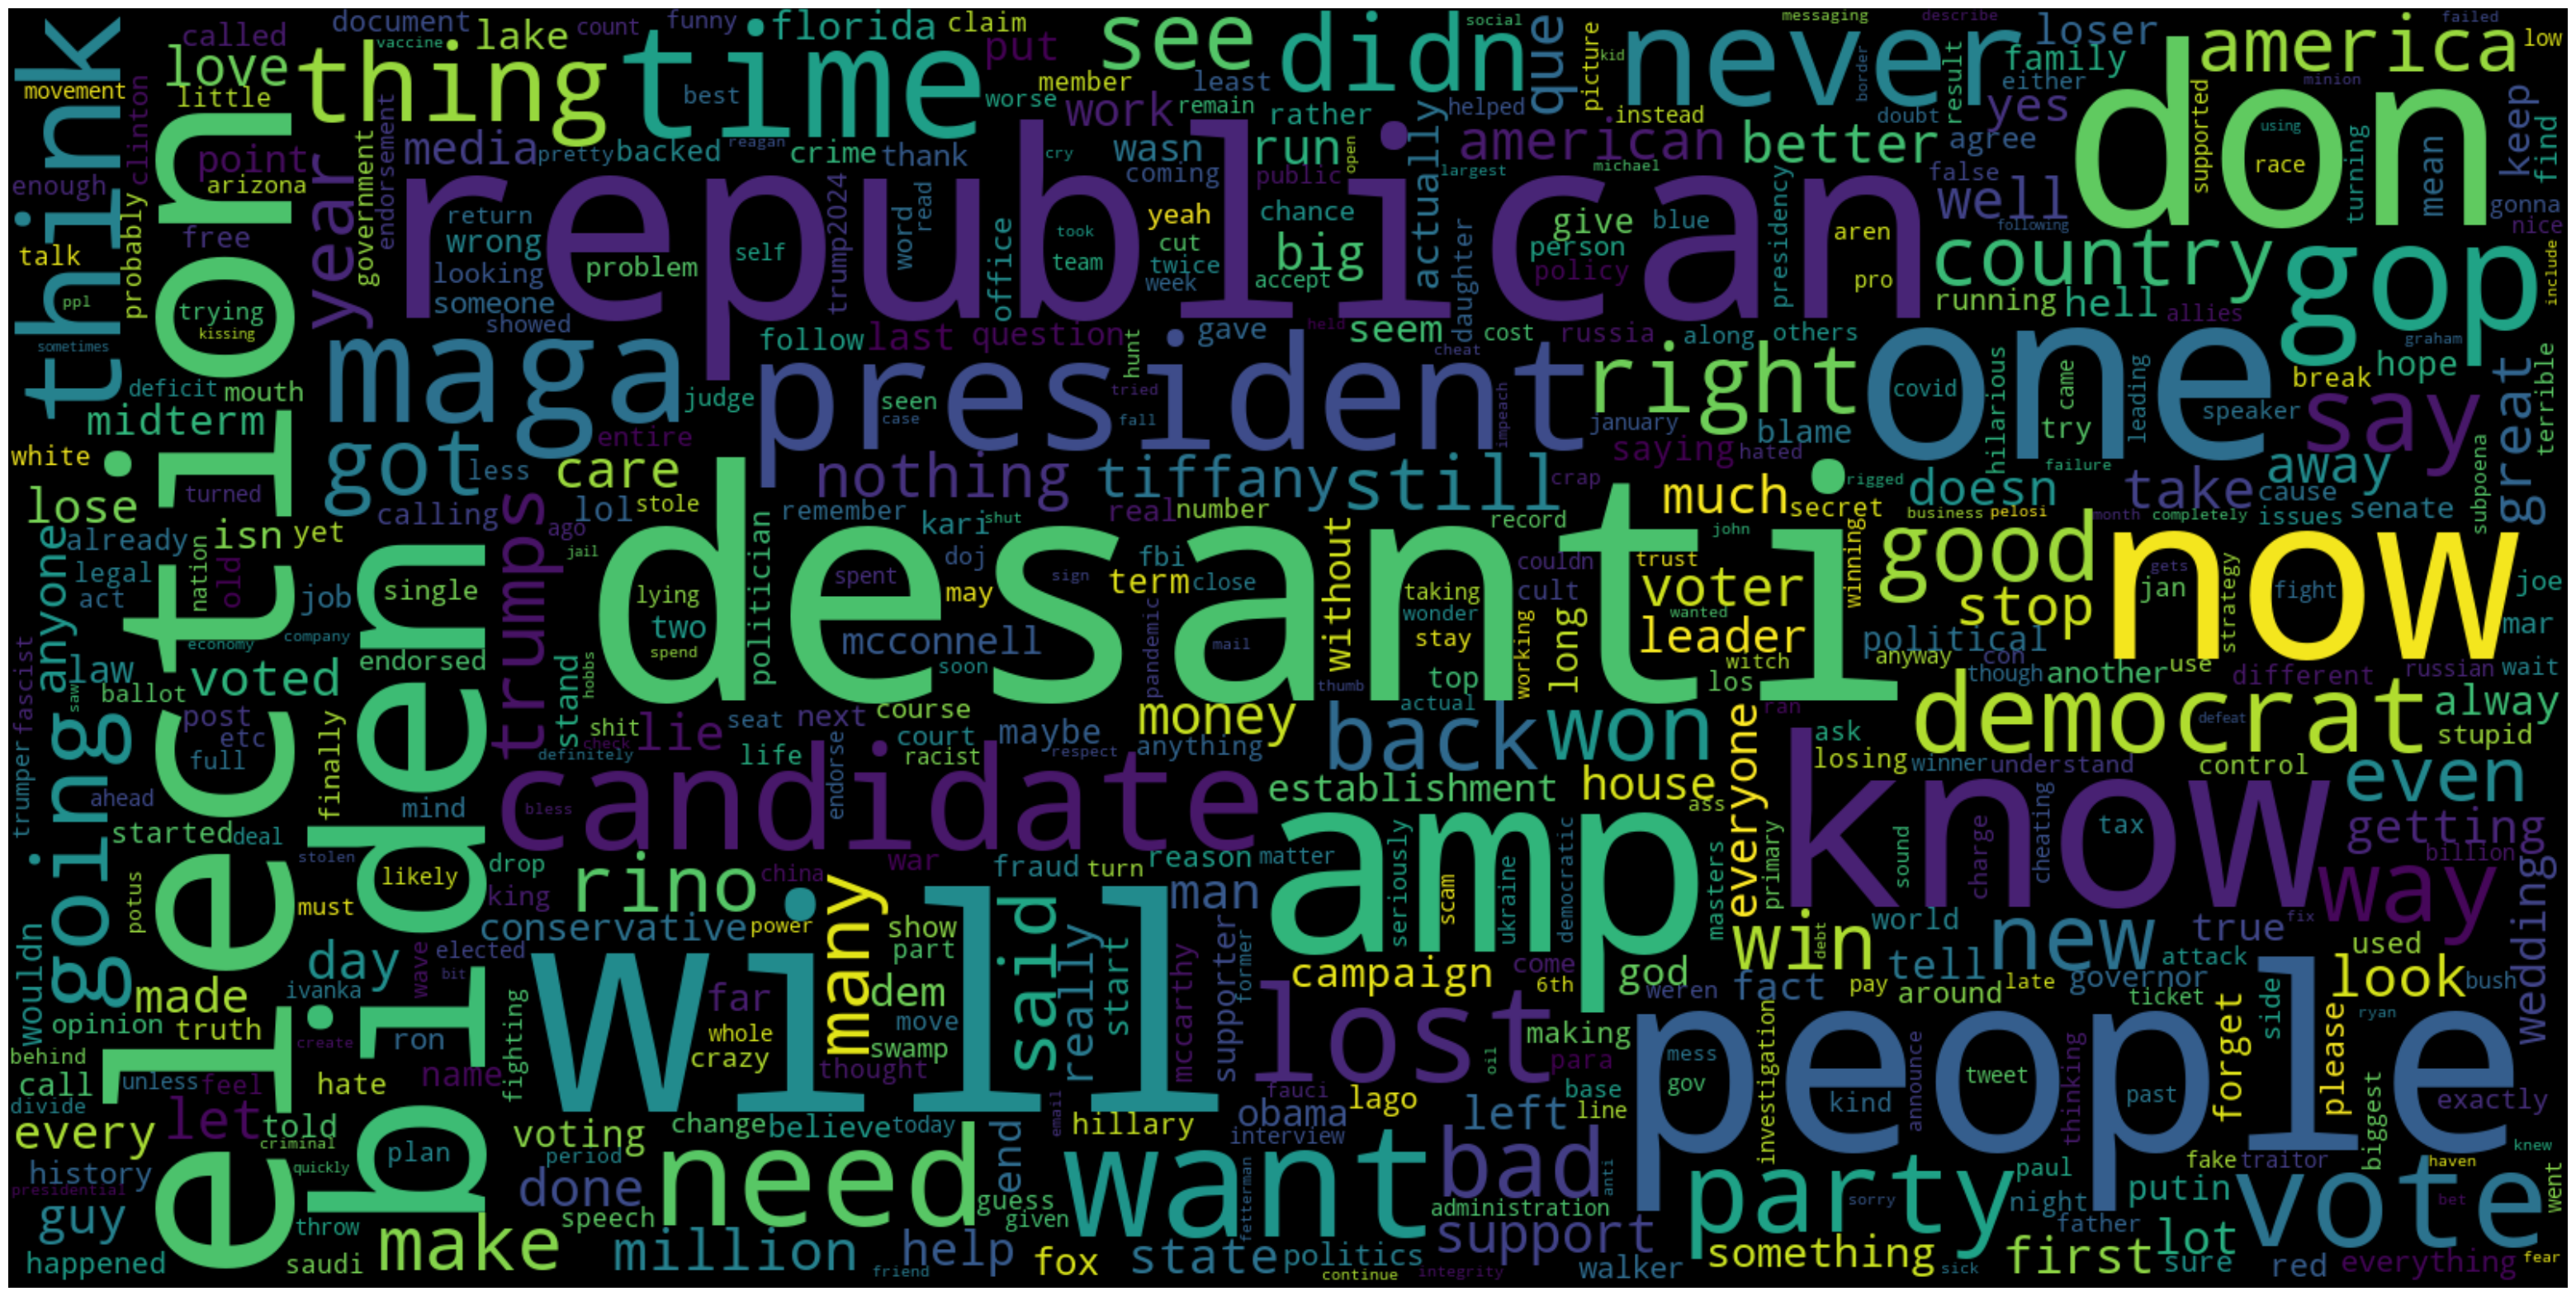

In [16]:
from wordcloud import STOPWORDS
stopwords = set(STOPWORDS)
custom_stopwords = ['donald','trump']
stopwords.update(custom_stopwords)

from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=1600, stopwords=stopwords,height=800,max_font_size=200,max_words=500,collocations=False, background_color='black').generate(string)
plt.figure(figsize=(40,30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#### BERT Model

In [7]:
!pip install transformers requests beautifulsoup4 pandas numpy
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import requests
import re

In [8]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')


In [9]:
tokens = tokenizer.encode('I Love', return_tensors='pt')
result = model(tokens)
result.logits
int(torch.argmax(result.logits))+1


5

In [10]:
def sentiment_score(review):
    tokens = tokenizer.encode(review, return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits))+1

In [11]:
test = df.iloc[0]['Text']
test

' She’s got the fashion sense of a trump.'

In [12]:
sentiment_score(test)

4

In [13]:
df['sentiment'] = df['Text'].apply(lambda x: sentiment_score(x[:512]))


Text(0, 0.5, 'Frequency')

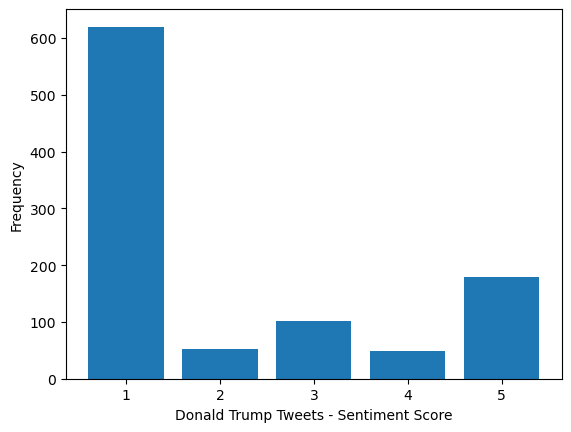

In [17]:
import matplotlib.pyplot as plt

a = df['sentiment'].value_counts()
y = [a[1],a[2],a[3],a[4],a[5]]
x = [1,2,3,4,5]
plt.bar(x,y)

plt.xlabel("Donald Trump Tweets - Sentiment Score")
plt.ylabel("Frequency")

In [18]:
a

1    620
5    180
3    101
2     52
4     48
Name: sentiment, dtype: int64